In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [8]:
# Load the fashion_mnist dataset
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

#calss names 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Normalize the pixel values to be between 0 and 1
X_train_all = x_train_all / 255.0

In [15]:
print("X_train_all shape :",x_train_all.shape)
print("X_test shape :", x_test.shape)

X_train_all shape : (60000, 28, 28)
X_test shape : (10000, 28, 28)


In [16]:
#spliting data to train , validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train_all, y_train_all)

In [17]:
print("x_train shape :",x_train.shape)
print("x_val shape :", x_val.shape)

x_train shape : (45000, 28, 28)
x_val shape : (15000, 28, 28)


In [18]:
# Define the model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(400, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [19]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Train the model with overfitting
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.5834 - accuracy: 0.7901 - val_loss: 0.4302 - val_accuracy: 0.8471
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.4508 - accuracy: 0.8349 - val_loss: 0.3996 - val_accuracy: 0.8557
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4210 - accuracy: 0.8468 - val_loss: 0.3818 - val_accuracy: 0.8580
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3964 - accuracy: 0.8529 - val_loss: 0.3678 - val_accuracy: 0.8655
Epoch 5/100
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3836 - accuracy: 0.8598 - val_loss: 0.3549 - val_accuracy: 0.8721
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3707 - accuracy: 0.8624 - val_loss: 0.3422 - val_accuracy: 0.8722
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3623 - accuracy: 0.8681 - val_loss: 0.3537 -

In [21]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


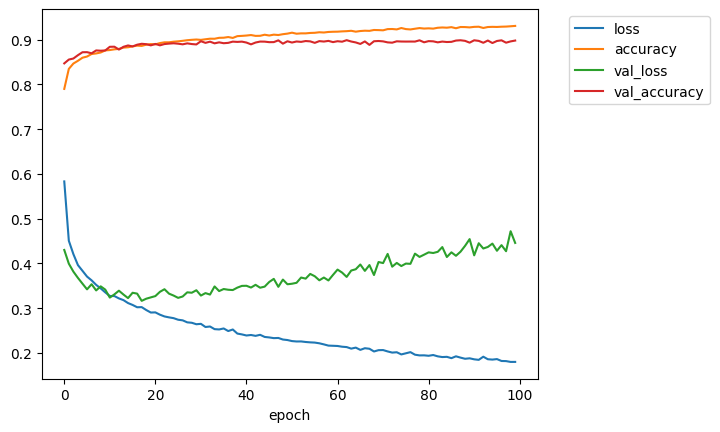

In [22]:
#inspect the fit history to see how the model perform in each epoch.
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

* we see that after `epoch` `15` there is a big difference between `train_loss` and `val_loss` , which mean its an `overfitting`


In [23]:
# evaluate the model on test data
loss, acc = model.evaluate(x_test, y_test)
print("loss : {} , accuracy : {} ".format(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 111.8582 - accuracy: 0.8804
loss : 111.85816192626953 , accuracy : 0.8804000020027161 


In [39]:
# Add early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [40]:
# Re-compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
# Train the model with early stopping
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1859 - accuracy: 0.9297 - val_loss: 120.4226 - val_accuracy: 0.8791
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1844 - accuracy: 0.9293 - val_loss: 114.8529 - val_accuracy: 0.8780
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1828 - accuracy: 0.9306 - val_loss: 124.9105 - val_accuracy: 0.8728
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1803 - accuracy: 0.9322 - val_loss: 129.0600 - val_accuracy: 0.8713
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1831 - accuracy: 0.9290 - val_loss: 118.6135 - val_accuracy: 0.8790
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1780 - accuracy: 0.9309 - val_loss: 132.7654 - val_accuracy: 0.8787
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1784 - accuracy: 0.9313 - val_l

* we see that model stoped in epoch `12`

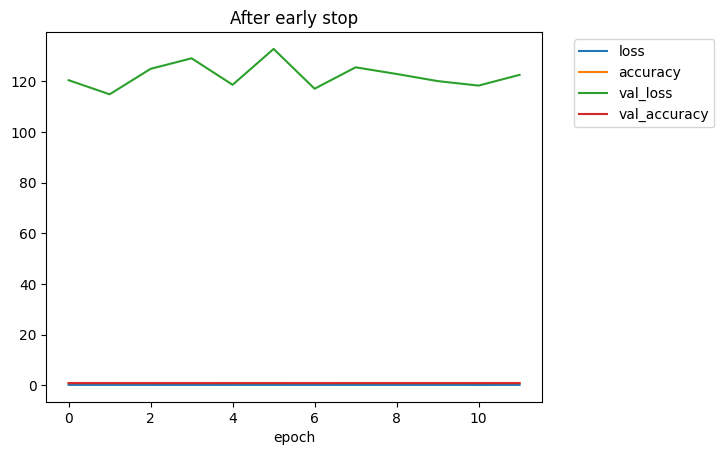

In [44]:
#inspect the fit history to see how the model perform in each epoch.
pd.DataFrame(history.history).plot()
plt.title("After early stop")
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

* now we see a big difference from the previous plot 

In [45]:
# evaluate the model on test data
loss, acc = model.evaluate(x_test, y_test)
print("loss : {} , accuracy : {} ".format(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 114.8529 - accuracy: 0.8780
loss : 114.85285949707031 , accuracy : 0.878000020980835 


In [46]:
y = model.predict(x_test[:3])
output_name = np.argmax(y, axis= 1)
pred = [class_names[x] for x in output_name]
pred

1/1 [==============================] - 0s 47ms/step


['Ankle boot', 'Pullover', 'Trouser']

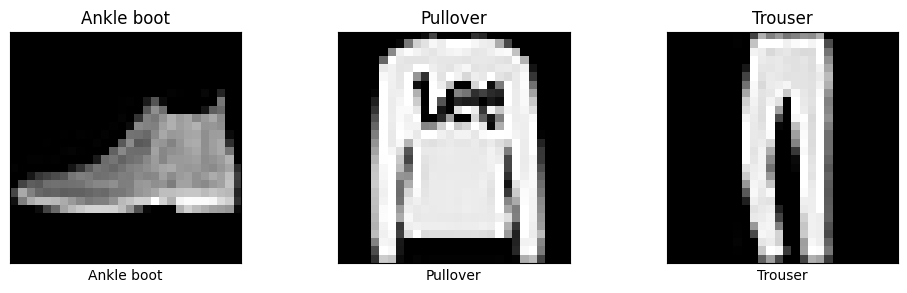

In [47]:
# display any photo with title of "true class" and xlabel of "prediction"
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for i in range(3):
    ax = axes[i]
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(class_names[y_test[i]])
    ax.set_xlabel(pred[i])
    ax.set_xticks([])
    ax.set_yticks([])
    

plt.tight_layout()
plt.show()

In [99]:
#create a prediction function
def name_prediction(x):

  if (type(x) != 'int' ) and (x in range(len(x_test))): 
      # to solve the shape error
      x_single = np.array([x_test[x]])
      # predict the output of x
      y = model.predict(x_single)
      # get the index of the max prob prediction
      output_index = np.argmax(y)
      # get prediction name
      pred_name = class_names[output_index]

      # display the img 
      plt.imshow(x_test[x], cmap='gray')
      plt.title(f'True class: {class_names[y_test[x]]}')
      plt.xlabel(f'prediected: {pred_name}')
      plt.xticks([])
      plt.yticks([])
      plt.show();
      print()
  else:
    print("plz , enter number from 0 to 9999")

1/1 [==============================] - 0s 38ms/step


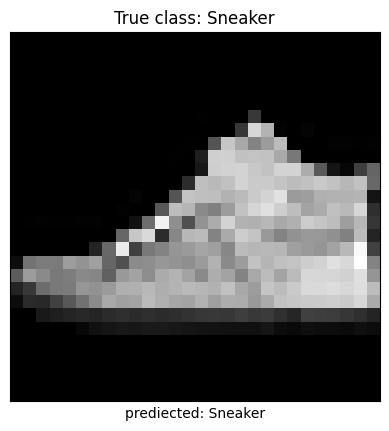

In [100]:
# enter the index of the photo from 0 to 9999
name_prediction(1398)

1/1 [==============================] - 0s 23ms/step


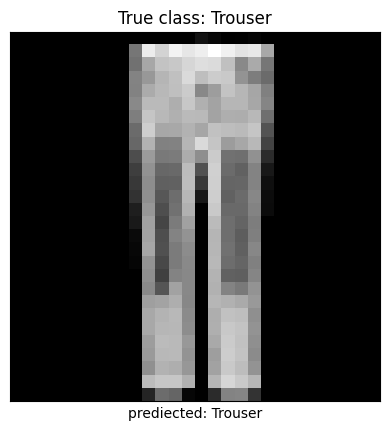


1/1 [==============================] - 0s 32ms/step


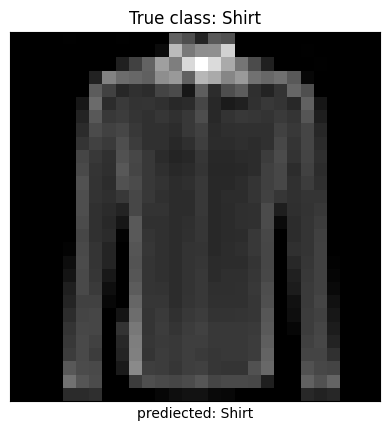


plz , enter number from 0 to 9999


In [101]:
# if you have a list of imges
x=[15,550,15000]
for i in x:
  name_prediction(i)